# Classification: Logistic Regression with Regularization


### Theoretical notes
- Function is defined as: \begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\ \\
\end{align}
- The formula for a ***sigmoid function*** is as follows  
\begin{align}
    g(z) = \frac{1}{1+e^{-z}}\
\end{align}
  * In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
 In the case of a single example, $z$ is scalar.
  * in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.
- Where z is:
\begin{align}
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\ \\
\end{align}

- Logistic-Regression uses a ***loss function*** suited for the task of categorization where the target is 0 or 1 rather than any number
 * The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target $y=0$ and another for when the target is $y=1$. Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target.
 * $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

- ***The cost function*** is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \$$

- For ***regularized*** **logistic** ***regression***, the ***cost function*** is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \$$
  * the difference is the regularization term, which is    
  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>
  * the parameter $b$ is not regularized. This is standard practice.

- ***Gradient descent algorithm*** utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$


### FIRST EXAMPLE  - ***Linear*** Logistic Regression with Regularized Cost function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

np.set_printoptions(precision=8)

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost/m
    reg_cost = (lambda_/(2*m)) * np.sum(w**2)
    total_cost = cost + reg_cost
    return total_cost

def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * X[i]
        dj_db += err_i
    dj_dw = dj_dw/m + (lambda_/m) * w
    dj_db = dj_db/m
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic_reg(X, y, w, b, lambda_=1)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:
            J_history.append(compute_cost_logistic_reg(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    return w, b, J_history

def plot_data(X, y, ax):
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', c='r', label='y=1')
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', c='b', label='y=0')
    ax.legend()




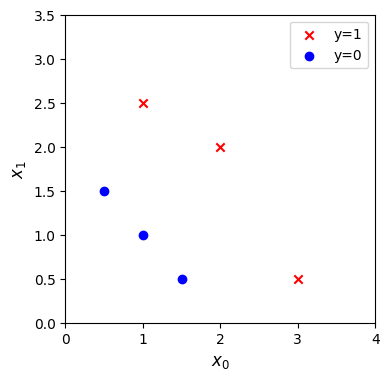

Iteration    0: Cost 0.6846857000420554
Iteration 1000: Cost 0.520332141456904
Iteration 2000: Cost 0.5203016151380848
Iteration 3000: Cost 0.5203016077007425
Iteration 4000: Cost 0.5203016076989254
Iteration 5000: Cost 0.5203016076989251
Iteration 6000: Cost 0.5203016076989251
Iteration 7000: Cost 0.520301607698925
Iteration 8000: Cost 0.520301607698925
Iteration 9000: Cost 0.520301607698925

Updated parameters: w: [0.90411532 0.73588062], b: -2.3337541849928076


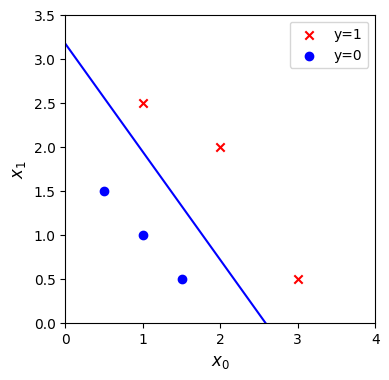

In [ ]:
# Dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

# Run gradient descent algorithm
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nUpdated parameters: w: {w_out}, b: {b_out}")

# Plot the decision boundary
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

x0 = np.arange(0, 4, 0.01)
x1 = (-b_out - w_out[0] * x0) / w_out[1]
ax.plot(x0, x1, c="b")

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

### SECOND EXAMPLE  - ***Linear*** Logistic Regression with ***SKLEARN***



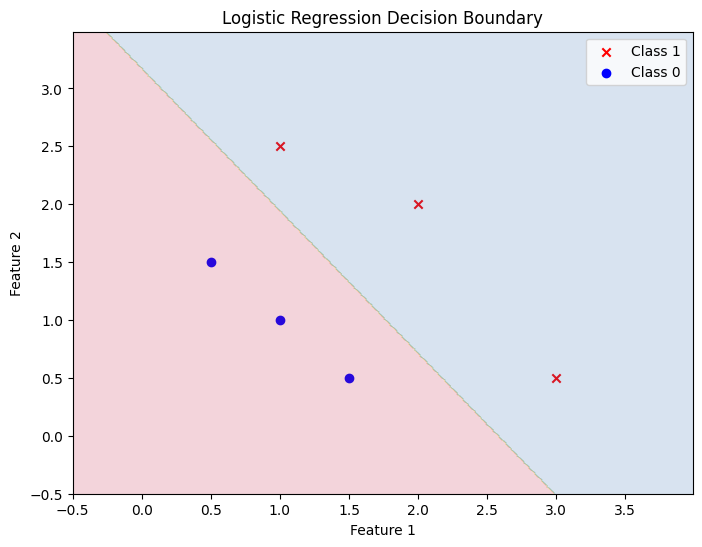

Prediction on training set: [0 0 0 1 1 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# dataset

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

# Fit the model with the training data

lr_model = LogisticRegression()
lr_model.fit(X, y)

# Plotting the initial data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
pos = y == 1
neg = y == 0
ax.scatter(X[pos, 0], X[pos, 1], marker='x', c='r', label='Class 1')
ax.scatter(X[neg, 0], X[neg, 1], marker='o', c='b', label='Class 0')
ax.legend()

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Spectral)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()

# make predictions

y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

### THIRD EXAMPLE  - ***Polynomial*** Logistic Regression with ***SKLEARN***

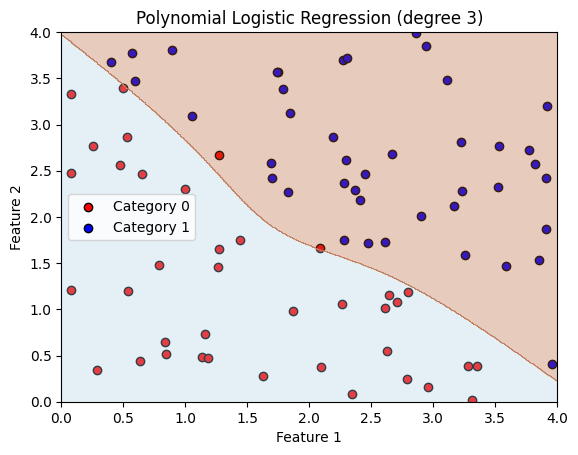

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Generate a larger dataset
np.random.seed(0)
X = np.random.rand(80, 2) * 4  # Random points in the range [0, 4)
y = (X[:, 0] + X[:, 1] > 4).astype(int)  # Label: 1 if x0 + x1 > 4, else 0

# Transform features to polynomial features
degree = 3  #  Polynomial degree
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Create a pipeline that first scales the data, then transforms to polynomial features, then applies logistic regression
model = make_pipeline(StandardScaler(), poly, LogisticRegression(C=1.0, max_iter=500)) # Adjust C for regularization strength

# Fit the model with the training data
model.fit(X, y)

# Generate a grid of points to plot the decision boundary
x_min, x_max = 0, 4
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the initial data
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Category 0', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Category 1', edgecolor='k')

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial Logistic Regression (degree {})'.format(degree))
plt.legend()
plt.show()